# Object-oriented programming in investment


## Author: Hubert Antoniewicz
    
## Date: 10/2023


### Description: 
    
This project presents object-oriented programming in Python. It creates object  ***Stock*** to which we can assign any company listed on NYSE in the United States and available on *YahooFinance*. 

It also includes:
+ start and end date of analysis
+ calculating cumulative return
+ dividend yield
+ market capitalisation

### Importing packages: 

In [1]:
#pip install yfinance

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Creating stock object: 

Assumptions:
+ At the very beginning, 0 has to be assigned to 'data' feature, before we use function *download data*
+ Start date has to be before the end date of analysis
+ There are also included some comments including dividend yield and market cap of the chosen stock

In [3]:
class Stock:

    def __init__(self, data, ticker, start, end):

        self.data = data
        self.ticker = ticker
        self.start = start
        self.end = end

        if self.data != 0:
            raise ValueError('Before downloading data, data has to be equal to 0!')
        if self.start > self.end:
            raise ValueError('Start date cannot be after end date!')

    def __repr__(self):
        return 'Analyzed stock ticker: {}. \nAnalyzed timeline is {} : {}]'.format(self.ticker, self.start, self.end)

    def download_data(self):
        self.data = yf.download(self.ticker, self.start, self.end)['Adj Close']
        return self.data

    def calc_cumreturn(self):
        self.ret = (self.data.iloc[-1]-self.data.iloc[0])/self.data.iloc[0]
        if float(self.ret) > 0:
            print('Company {} gained {}% between {} and {} '.format(self.ticker, round(self.ret*100, 2), self.start, self.end))
        else:
            print('Company {} lost {}% between {} and {} '.format(self.ticker, round(self.ret * 100, 2), self.start, self.end))

    def get_fundamentals(self):
        self.fundamentals = yf.Ticker(self.ticker)

        if self.fundamentals:
            return self.fundamentals
        else:
            raise ValueError('Unfortunately, fundamentals for this company are not available. Try other company!')

    def get_dividend(self):
        self.dividend = self.fundamentals.info['dividendRate']

        if self.dividend:
            if float(self.dividend) > 2:
                print('Company {} is probably a dividend company!'.format(self.ticker))
            elif float(self.dividend) < 1:
                print('{} is probably a growth company!'.format(self.ticker))
        else:
            pass
            self.dividend = 0
            print('{} is probably a growth company!'.format(self.ticker))
            
        print('Company {} pays {} % dividend'.format(self.ticker, self.dividend))

    def get_cap(self):
        self.marketcap = self.fundamentals.info['marketCap']

        if self.marketcap:
            if float(self.marketcap) > 1500000000000:
                print('{} is one of the largest companies in the world!'.format(self.ticker))
        print('Company {} is worth {}$ in total'.format(self.ticker, self.marketcap))


## Select your companies

List of companies listed in United States is available on **[EOS Data](https://eoddata.com/symbols.aspx?AspxAutoDetectCookieSupport=1)** website:

### And let's look at them!

In [4]:
startdate = '2023-01-01'
enddate = '2023-10-25'

s1 = Stock(0, 'AAPL', startdate, enddate)
print(s1)

s1.download_data()
s1.calc_cumreturn()
s1.get_fundamentals()
s1.get_dividend()
s1.get_cap()
print("_________________________")


s2 = Stock(0, 'JNJ', startdate, enddate)
print(s2)

s2.download_data()
s2.calc_cumreturn()
s2.get_fundamentals()
s2.get_dividend()
s2.get_cap()
print("_________________________")

if s1.start != s2.start or s1.end != s2.end:
    raise ValueError('Analyzed period has to be the same for both companies!!!')

Analyzed stock ticker: AAPL. 
Analyzed timeline is 2023-01-01 : 2023-10-25]
[*********************100%%**********************]  1 of 1 completed
Company AAPL gained 39.27% between 2023-01-01 and 2023-10-25 
AAPL is probably a growth company!
Company AAPL pays 0.96 % dividend
AAPL is one of the largest companies in the world!
Company AAPL is worth 2675011747840$ in total
_________________________
Analyzed stock ticker: JNJ. 
Analyzed timeline is 2023-01-01 : 2023-10-25]
[*********************100%%**********************]  1 of 1 completed
Company JNJ lost -13.25% between 2023-01-01 and 2023-10-25 
Company JNJ is probably a dividend company!
Company JNJ pays 4.76 % dividend
Company JNJ is worth 364982075392$ in total
_________________________


If we want to compare both stocks, the timeline has to be the same for both of the companies.

In [5]:
def compare_stocks(stock1, stock2):

    print('Lets compare', stock1.ticker, 'and',stock2.ticker,'!')
    print("_________________________")

    if stock1.dividend > stock2.dividend:
        print("Company {} pays larger dividend than company {}".format(stock1.ticker, stock2.ticker))
    elif stock1.dividend < stock2.dividend:
        print("Company {} pays larger dividend than company {}".format(stock2.ticker, stock1.ticker))
    else:
        print("Company {} pays the same dividend as {} which equals to {}".format(stock1.ticker, stock2.ticker, stock1.dividend))

    if stock1.ret < 0 and stock2.ret < 0:
        print("Both companies lost in analysed period")
    if stock1.ret > stock2.ret:
        print("{} stock price increased more than {} between {} and {}".format(stock1.ticker, stock2.ticker, stock1.start, stock1.end))
    elif stock1.ret < stock2.ret:
        print("{} stock price increased more than {} between {} and {}".format(stock2.ticker, stock1.ticker, stock1.start, stock1.end))

    if stock1.marketcap > stock2.marketcap:
        print("Company {} is worth more than company {}".format(stock1.ticker, stock2.ticker))
    elif stock1.marketcap < stock2.marketcap:
        print("Company {} is worth more than company {}".format(stock2.ticker, stock1.ticker))


compare_stocks(s1, s2)

Lets compare AAPL and JNJ !
_________________________
Company JNJ pays larger dividend than company AAPL
AAPL stock price increased more than JNJ between 2023-01-01 and 2023-10-25
Company AAPL is worth more than company JNJ


We can also plot both stocks.

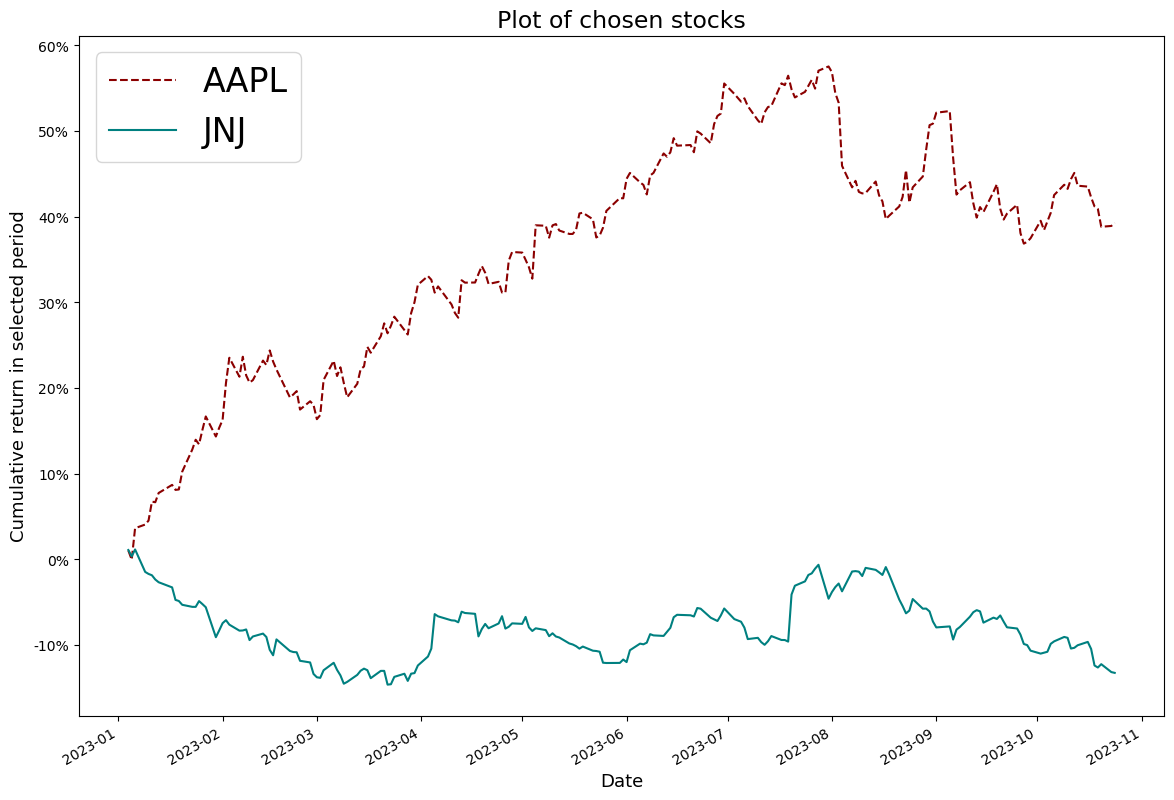

In [6]:
def plot_stocks(stock1, stock2):

    ((stock1.data.pct_change() + 1).cumprod()-1).plot(figsize=(14, 10), ls = '--', c='darkred', label=stock1.ticker)
    ((stock2.data.pct_change() + 1).cumprod()-1).plot(figsize=(14, 10), ls = '-', c='teal', label=stock2.ticker)
    plt.legend(prop={"size":24})
    plt.title('Plot of chosen stocks', fontsize=17)
    plt.ylabel('Cumulative return in selected period', fontsize=13)
    plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
    plt.xlabel('Date', fontsize=13)
    plt.show()


plot_stocks(s1, s2);